## Playing with Austrian athletes and formatting options

Contents
1. How many Austrians took part in Olympic Games?
2. How many times did an athlete took part and what was his age?
3. output formatting
4. A 'LIKE' query for similar names
5. What is the average age of all athletes?
6. Who were the oldest and the youngest Austrian athletes?
7. Service query to Wikidata to retrieve the image for an athlete

### Uncomment if not installed

In [1]:
# import sys
# !{sys.executable} -m pip install rdflib pandas sparqldataframe simplejson scikit-image

In [2]:
from rdflib import Graph

### Import ttl files

Switch between the data source folder for the turtle files.  
"ttl" imports the files generated with OpenRefine  
"tarql" imports the files generated with tarql

In [3]:
source = "ttl"
# source = "tarql"

In [4]:
g = Graph()
g.parse(source + "/Athletes.ttl", format="turtle")
print(len(g))

15317


In [5]:
g.parse("ttl/Noc_Regions.ttl", format="turtle")
print(len(g))

15547


## 1. How many Austrians took part in Olympic Games?

In [6]:
result = g.query("""
    PREFIX foaf:  <http://xmlns.com/foaf/0.1/>
    PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>

    SELECT (COUNT(DISTINCT ?name) AS ?count)
    WHERE {
        ?athlete a foaf:Person;
                 rdfs:label ?name;
    }
""")

for row in result:
    print("%s Austrian took part" % row)

2334 Austrian took part


## 2. How many times did an athlete took part and what was his age?

eg: Hubert Raudaschl, Christoph Sumann, Hermann Maier, ...

In [7]:
athlete = "'Hubert Raudaschl'"

result = g.query("""
    PREFIX foaf:  <http://xmlns.com/foaf/0.1/>
    PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
    PREFIX dbo: <http://dbpedia.org/ontology/>
    PREFIX ex: <http://example.org/ontology/olympics/>
    PREFIX noc: <http://example.org/resource/olympics/NOC/>

    SELECT ?athleteLabel ?age ?country
    WHERE {
        ?athlete a foaf:Person;
                 rdfs:label """ + athlete +"""@en;
                 foaf:age ?age;
                 rdfs:label ?athleteLabel;
                 ex:noc ?noc .
        ?noc dbo:country ?country .
        FILTER (langMatches( lang(?athleteLabel), "en" ) )
    }
    ORDER BY ?age
""")

print("Total ",len(result))

for row in result:
    print(row)

Total  9
(rdflib.term.Literal('Hubert Raudaschl', lang='en'), rdflib.term.Literal('22', datatype=rdflib.term.URIRef('http://www.w3.org/2001/XMLSchema#int')), rdflib.term.Literal('Austria'))
(rdflib.term.Literal('Hubert Raudaschl', lang='en'), rdflib.term.Literal('26', datatype=rdflib.term.URIRef('http://www.w3.org/2001/XMLSchema#int')), rdflib.term.Literal('Austria'))
(rdflib.term.Literal('Hubert Raudaschl', lang='en'), rdflib.term.Literal('30', datatype=rdflib.term.URIRef('http://www.w3.org/2001/XMLSchema#int')), rdflib.term.Literal('Austria'))
(rdflib.term.Literal('Hubert Raudaschl', lang='en'), rdflib.term.Literal('33', datatype=rdflib.term.URIRef('http://www.w3.org/2001/XMLSchema#int')), rdflib.term.Literal('Austria'))
(rdflib.term.Literal('Hubert Raudaschl', lang='en'), rdflib.term.Literal('37', datatype=rdflib.term.URIRef('http://www.w3.org/2001/XMLSchema#int')), rdflib.term.Literal('Austria'))
(rdflib.term.Literal('Hubert Raudaschl', lang='en'), rdflib.term.Literal('41', datatyp

## 3. Output Formatting
### Format %

In [8]:
for row in result:
    print("Athlete: %s, Age: %s, COO: %s" % row)

Athlete: Hubert Raudaschl, Age: 22, COO: Austria
Athlete: Hubert Raudaschl, Age: 26, COO: Austria
Athlete: Hubert Raudaschl, Age: 30, COO: Austria
Athlete: Hubert Raudaschl, Age: 33, COO: Austria
Athlete: Hubert Raudaschl, Age: 37, COO: Austria
Athlete: Hubert Raudaschl, Age: 41, COO: Austria
Athlete: Hubert Raudaschl, Age: 46, COO: Austria
Athlete: Hubert Raudaschl, Age: 49, COO: Austria
Athlete: Hubert Raudaschl, Age: 53, COO: Austria


### with index

In [9]:
for index,row in enumerate(result):
    print(index+1, "Athlete: %s, Age: %s, COO: %s" % row)

1 Athlete: Hubert Raudaschl, Age: 22, COO: Austria
2 Athlete: Hubert Raudaschl, Age: 26, COO: Austria
3 Athlete: Hubert Raudaschl, Age: 30, COO: Austria
4 Athlete: Hubert Raudaschl, Age: 33, COO: Austria
5 Athlete: Hubert Raudaschl, Age: 37, COO: Austria
6 Athlete: Hubert Raudaschl, Age: 41, COO: Austria
7 Athlete: Hubert Raudaschl, Age: 46, COO: Austria
8 Athlete: Hubert Raudaschl, Age: 49, COO: Austria
9 Athlete: Hubert Raudaschl, Age: 53, COO: Austria


### with pandas DataFrame

In [10]:
from pandas import DataFrame

DataFrame(result, columns=result.vars)

,athleteLabel,age,country
0,Hubert Raudaschl,22,Austria
1,Hubert Raudaschl,26,Austria
2,Hubert Raudaschl,30,Austria
3,Hubert Raudaschl,33,Austria
4,Hubert Raudaschl,37,Austria
5,Hubert Raudaschl,41,Austria
6,Hubert Raudaschl,46,Austria
7,Hubert Raudaschl,49,Austria
8,Hubert Raudaschl,53,Austria


## 4. A 'LIKE' query for similar names

In [11]:
athlete = "'Maier'"

result = g.query("""
    PREFIX foaf:  <http://xmlns.com/foaf/0.1/>
    PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
    PREFIX dbo: <http://dbpedia.org/ontology/>
    PREFIX ex: <http://example.org/ontology/olympics/>
    PREFIX noc: <http://example.org/resource/olympics/NOC/>

    SELECT DISTINCT ?Athletes
    WHERE {
        ?athlete a foaf:Person;
                 rdfs:label ?Athletes;
        FILTER (langMatches( lang(?Athletes), "en" ) )
        FILTER CONTAINS(?Athletes,""" + athlete +""")
    }
    ORDER BY ?Athletes
""")

df = DataFrame(result, columns=result.vars)
df.index +=1
df


,Athletes
1,Alexander Maier
2,Ariane Maier
3,Benjamin Maier
4,Hermann Maier
5,Markus Maier
6,Monika Maierhofer
7,Raphael Maier
8,Ulrike Maier


## 5. What is the average age of all athletes?

In [12]:
result = g.query("""
    PREFIX foaf:  <http://xmlns.com/foaf/0.1/>
    PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>

    SELECT (ROUND(AVG(?age)) AS ?rounded_average_age)
    WHERE {
        ?athlete a foaf:Person;
                 foaf:age ?age; 
    }
""")   
for row in result:
    print("Average Age: %s" % row)

Average Age: 27


## 6. Who were the oldest and the youngest Austrian athletes?

In [13]:
result = g.query("""
PREFIX foaf:  <http://xmlns.com/foaf/0.1/>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>

SELECT ?Name ?Age WHERE {
{
    SELECT ?Name ?Age
    WHERE {
    ?athlete a foaf:Person;
             rdfs:label ?Name;
             foaf:age ?Age;
    }
    ORDER BY ASC(?Age)
    LIMIT 1
}
UNION {
    {
    SELECT ?Name ?Age
        WHERE {
        ?athlete a foaf:Person;
                 rdfs:label ?Name;
                 foaf:age ?Age;
        }
        ORDER BY DESC(?Age)
        LIMIT 1
    } 
} 
}
""")   

DataFrame(result, columns=result.vars)

,Name,Age
0,Werner Grieshofer,12
1,Albin Dbrich,76


## 7. Service query to Wikidata to retrieve the image for an athlete

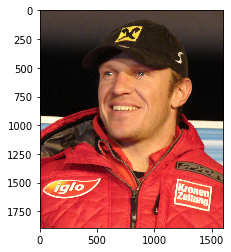

In [14]:
import sparqldataframe
from skimage import io
import matplotlib.pyplot as plt

q = """
    SELECT ?item ?itemLabel ?pic WHERE {
        ?item wdt:P31 wd:Q5.
        ?item wdt:P18 ?pic .
        ?item ?label "Hermann Maier"@en .
        SERVICE wikibase:label { bd:serviceParam wikibase:language "en". }
    }
"""

df = sparqldataframe.wikidata_query(q)
df.head()
# pic = df.iloc[0]['pic']

image = io.imread(df.iloc[0]['pic'])
plt.imshow(image)
plt.show()